This notebook is copied and pasted from 

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import matplotlib.pyplot as plt

n = 10

fig, ax = plt.subplots(1, n, figsize=(10, 2))
for idx, image in enumerate(train_images[:10]):
    ax[idx].imshow(image, cmap=plt.cm.Greys)
    ax[idx].set_xticks([])
    ax[idx].set_yticks([])
    ax[idx].set_title(train_labels[idx], fontsize=18)

plt.show()

<Figure size 1000x200 with 10 Axes>

In [4]:
# Flatten images
train_images = train_images.reshape((60000, 28 * 28))
# Normalise images
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers

nn = models.Sequential()
nn.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
nn.add(layers.Dense(10, activation='softmax'))

nn.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
nn.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2579 - acc: 0.9252
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1048 - acc: 0.9685
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0686 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0495 - acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0373 - acc: 0.9890


In [8]:
test_loss, test_accuracy = nn.evaluate(test_images, test_labels)

print('test_acc:', test_accuracy)

10000/10000 [==============================] - 0s 37us/step
test_acc: 0.9795


In [9]:
import onnxmltools

onnx_model = onnxmltools.convert_keras(nn) 

onnxmltools.utils.save_model(onnx_model, 'keras_example.onnx')

In [10]:
import onnxruntime

session = onnxruntime.InferenceSession("keras_example.onnx")

first_input_name = session.get_inputs()[0].name
print(first_input_name)

first_output_name = session.get_outputs()[0].name
print(first_output_name)

results = session.run([first_output_name], {first_input_name: test_images[0:3]})

for idx, result in enumerate(results[0]):
    print("Image %d, Actual number = " % idx, test_labels[idx])
    for i, p in enumerate(result):
        print("Probability of %d = %.4f" % (i, p))

dense_1_input_01
dense_2_Softmax_0
Image 0, Actual number =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Probability of 0 = 0.0000
Probability of 1 = 0.0000
Probability of 2 = 0.0000
Probability of 3 = 0.0000
Probability of 4 = 0.0000
Probability of 5 = 0.0000
Probability of 6 = 0.0000
Probability of 7 = 1.0000
Probability of 8 = 0.0000
Probability of 9 = 0.0000
Image 1, Actual number =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Probability of 0 = 0.0000
Probability of 1 = 0.0000
Probability of 2 = 1.0000
Probability of 3 = 0.0000
Probability of 4 = 0.0000
Probability of 5 = 0.0000
Probability of 6 = 0.0000
Probability of 7 = 0.0000
Probability of 8 = 0.0000
Probability of 9 = 0.0000
Image 2, Actual number =  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Probability of 0 = 0.0000
Probability of 1 = 0.9983
Probability of 2 = 0.0004
Probability of 3 = 0.0000
Probability of 4 = 0.0000
Probability of 5 = 0.0001
Probability of 6 = 0.0000
Probability of 7 = 0.0005
Probability of 8 = 0.0006
Probability of 9 = 0.0000


In [11]:
from azureml.core import Workspace

In [12]:
ws = Workspace.create(name = 'boba',
                      subscription_id = 'fa736200-1de1-47e6-9872-78e6815e3fac', 
                      resource_group = 'c2chack',
                      create_resource_group = True,
                      location = 'eastus' 
                     )

INFO:azureml._vendor.azure_cli_core._session:Failed to load or parse file /home/lge/.azureml/auth/azureProfile.json. It will be overridden by default settings.
INFO:azureml._vendor.azure_cli_core._session:Failed to load or parse file /home/lge/.azureml/auth/az.json. It will be overridden by default settings.
INFO:azureml._vendor.azure_cli_core._session:Failed to load or parse file /home/lge/.azureml/auth/az.sess. It will be overridden by default settings.
INFO:azureml._vendor.azure_cli_core._session:Failed to load or parse file /home/lge/.azure/azureProfile.json. It will be overridden by default settings.
INFO:azureml._vendor.azure_cli_core._profile:Open browser with url: https://login.microsoftonline.com/common/oauth2/authorize?response_type=code&client_id=04b07795-8ddb-461a-bbee-02f9e1bf7b46&redirect_uri=http://localhost:8400&state=code&resource=https://management.core.windows.net/&prompt=select_account


Performing interactive authentication. Please follow the instructions on the terminal.


INFO:adal-python:f87c277c-a7c0-4eac-bd41-3a17fe40c260 - TokenRequest:Getting token with auth code.
INFO:adal-python:f87c277c-a7c0-4eac-bd41-3a17fe40c260 - OAuth2Client:Get Token Server returned this correlation_id: f87c277c-a7c0-4eac-bd41-3a17fe40c260
INFO:adal-python:4c3e1837-9b36-48c6-9c87-0216c24cbeb1 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:4c3e1837-9b36-48c6-9c87-0216c24cbeb1 - CacheDriver:Acquiring new access token from MRRT token.
INFO:adal-python:4c3e1837-9b36-48c6-9c87-0216c24cbeb1 - TokenRequest:Getting a new token from a refresh token
INFO:adal-python:4c3e1837-9b36-48c6-9c87-0216c24cbeb1 - OAuth2Client:Get Token Server returned this correlation_id: 4c3e1837-9b36-48c6-9c87-0216c24cbeb1
INFO:adal-python:4c3e1837-9b36-48c6-9c87-0216c24cbeb1 - CacheDriver:Returning token derived from mrrt refresh.
INFO:adal-python:f0642dc1-6f2c-4043-ba17-930842eab545 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:ddb

Interactive authentication successfully completed.


INFO:adal-python:8b6a01ca-f869-4395-a33a-2366dbb2dee4 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:ca37d7ed-9f52-43d3-9441-b4b9bc95f0b4 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:7c7a434b-f32e-4969-a071-5ac797db541e - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:9020930e-95d5-443c-8203-c500d268d1bb - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:80110fef-db4e-409d-a7e9-c38bde0ee06c - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:1f5d5054-76c3-4f04-ab16-84b5dc98eba1 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:11e06d67-9ca7-47e6-9ac8-afa381b58d99 - TokenRequest:Getting token from cache with refresh if necessary.


Deploying ContainerRegistry with name bobaacrwxdzhpuo.
Deployed ContainerRegistry with name bobaacrwxdzhpuo.
Deploying AppInsights with name bobainsightsurrvuykr.
Deployed AppInsights with name bobainsightsurrvuykr.
Deploying KeyVault with name bobakeyvaultfqytoini.
Deploying StorageAccount with name bobastoragewispfwfy.
Deployed KeyVault with name bobakeyvaultfqytoini.
Deployed StorageAccount with name bobastoragewispfwfy.
Deploying Workspace with name boba.
Deployed Workspace with name boba.


In [13]:
from azureml.core.model import Model

model = Model.register(model_path = "keras_example.onnx",
                       model_name = "MyONNXmodel",
                       description = "Test Keras Model",
                       workspace = ws)

INFO:adal-python:7604a063-e2ec-46c5-ace4-07859a814497 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:azureml._restclient.clientbase:Created a worker pool for first use
INFO:adal-python:aa21a1a1-08bc-49d3-aa50-7321d9cba153 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:5a9b6c23-d7ca-40e7-b2fa-3e1ddd77d773 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:dda58b40-ffb0-40c9-81b5-0c2a494ac1a5 - TokenRequest:Getting token from cache with refresh if necessary.


Registering model MyONNXmodel


In [14]:
%%writefile score.py

import json
import sys

from azureml.core.model import Model
import onnxruntime
import numpy as np

def init():
    global model_path
    model_path = Model.get_model_path(model_name = 'MyONNXmodel')

def run(raw_data):
    try:
        data = json.loads(raw_data)['data']
        data = np.array(data, dtype=np.float32)

        session = onnxruntime.InferenceSession(model_path)
        first_input_name = session.get_inputs()[0].name
        first_output_name = session.get_outputs()[0].name
        result = session.run([first_output_name], {first_input_name: data})
        # NumPy arrays are not JSON serialisable
        result = result[0].tolist()

        return {"result": result}
    except Exception as e:
        result = str(e)
        return {"error": result}

Writing score.py


In [15]:
from azureml.core.conda_dependencies import CondaDependencies 

myenv = CondaDependencies()
myenv.add_pip_package("numpy")
myenv.add_pip_package("azureml-core")
myenv.add_pip_package("onnxruntime")

with open("myenv.yml","w") as f:
    f.write(myenv.serialize_to_string())

In [16]:
from azureml.core.image import ContainerImage

image_config = ContainerImage.image_configuration(execution_script = "score.py",
                                                  runtime = "python",
                                                  conda_file = "myenv.yml",
                                                  description = "test"
                                                 )

In [17]:
image = ContainerImage.create(name = "myonnxmodelimage",
                              models = [model],
                              image_config = image_config,
                              workspace = ws)

image.wait_for_creation(show_output = True)

INFO:adal-python:9681c024-65d6-43b5-90ab-a3831aad3226 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:f0eb099a-e84e-4718-ae6c-0da6399bc929 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:542e1f62-e5a9-4dfe-8045-bb36bbe4b2b1 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:5dd6efff-7a31-4df4-8fcf-b1cb2a43938d - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:52299723-c0d5-4f88-b153-482503f3c230 - TokenRequest:Getting token from cache with refresh if necessary.


Creating image


INFO:adal-python:8d96d00e-79e0-4416-ae17-ba7164b3d303 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:7bb34995-b26a-4b8a-bd89-36b338a2ae0a - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:8ef0ea6f-ee8f-48bb-8a12-521a2c4a3064 - TokenRequest:Getting token from cache with refresh if necessary.


Running

INFO:adal-python:ff12c2aa-3aef-4e73-a5e0-ea2e405d1538 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:67234713-55ca-412c-bfdf-87838d54e9c0 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:2cdedd2d-540f-4699-acb9-a61efb6cf0b8 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:5ddf1389-7ad2-41d7-940e-9e76a22defc7 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:6b57da69-e26c-40f9-b7a2-cb3a34590118 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:1eac27fc-4a91-4817-8caf-9d34779c5e30 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:db70404b-5c19-4a5d-a74e-bbc2ecccf4a9 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:ab8f52d7-0aca-4595-9923-693cfba0edfc - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:6ae5fa7d-c887-4574-9e62-8f0d681ff8f1 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:82f46080-4010-473e-a096-b15459ae448c - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:214b45b7-82c1-44d8-a8d0-cbfe0461fda7 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:4c4ddbe9-15f2-4928-9394-bffb3a0991e0 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:91ef761e-f8cb-4aa6-b094-70dc70d9aaa8 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:a44de9d4-fdb8-44de-b078-be452c468301 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:9ebf6153-4c14-4840-9ffe-48d43238e30b - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:21fc61d2-606e-4ada-a24f-5a52a3b6eceb - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:5f5669db-37ce-40a9-b380-df49c3217dd9 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:504419a1-1604-42b1-816a-47b100f82410 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:77554166-bf21-48df-a102-6aa14b6001f7 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:494f2068-c204-4409-abb0-a4e33ab0ebed - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:2a451d12-ead5-4829-a22b-5117700439cd - TokenRequest:Getting token from cache with refresh if necessary.


.
Succeeded

INFO:adal-python:76b69c2a-8775-4562-9359-f1941acb0e92 - TokenRequest:Getting token from cache with refresh if necessary.


Image creation operation finished for image myonnxmodelimage:1, operation "Succeeded"


INFO:adal-python:e1152997-cf03-494c-b0b7-cc3fc175e147 - TokenRequest:Getting token from cache with refresh if necessary.


In [18]:
from azureml.core.webservice import AciWebservice, Webservice

aciconfig = AciWebservice.deploy_configuration(cpu_cores = 1, 
                                               memory_gb = 1, 
                                               tags = {"data": "mnist", "type": "classification"}, 
                                               description = 'Handwriting recognition')

service_name = 'keras-mnist-classification'
service = Webservice.deploy_from_image(deployment_config = aciconfig,
                                            image = image,
                                            name = service_name,
                                            workspace = ws)

service.wait_for_deployment(show_output = True)
print(service.state)

INFO:adal-python:5ac2dc56-7ded-467b-944c-e024f9da5c22 - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:23edda13-afb6-409b-913d-423156de4dfe - TokenRequest:Getting token from cache with refresh if necessary.


Creating service


INFO:adal-python:ea9b3286-adab-4252-91bb-d6d7b55df1cf - TokenRequest:Getting token from cache with refresh if necessary.
INFO:adal-python:65ca7e47-50ef-4048-9347-f0fb33100c54 - TokenRequest:Getting token from cache with refresh if necessary.


Running

INFO:adal-python:65040501-5d2c-415e-88cb-9dba89acf051 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:51944925-5a84-4a83-9d6b-b34629fc9048 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:7cad5274-d6a9-4bc2-8c61-afc6ad300ad7 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:a7711526-0dd1-4b34-954c-afb74a395012 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:fc3b9028-4414-43a6-ab55-87f593869867 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:ce5a2c61-58eb-4ec2-b31c-26c724d0220e - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:9effa737-c7bb-4cb4-97c4-0345cec65663 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:97ef5989-ca01-4c3a-8135-cd4ef9789a6b - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:a17b53d9-82bc-4068-acbb-e8d04f2eec26 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:b7c48deb-c3e5-4e33-b832-2e22dc9118dd - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:dcf5b58b-6bba-4608-9d39-8276dd9b5448 - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:ceeb8547-f8c4-4f29-a31c-2217b7ccd31c - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:ffcc806f-b17e-4943-9f62-507b8abb6eea - TokenRequest:Getting token from cache with refresh if necessary.


.

INFO:adal-python:c300e707-36c1-49c4-af99-404e8735aa6e - TokenRequest:Getting token from cache with refresh if necessary.


.
Succeeded

INFO:adal-python:71d11aa4-6ef3-43f7-b79d-3ccc96d46361 - TokenRequest:Getting token from cache with refresh if necessary.


ACI service creation operation finished, operation "Succeeded"
Healthy


In [19]:
print("Scoring API served at: {}".format(service.scoring_uri))

Scoring API served at: http://20.185.215.241:80/score


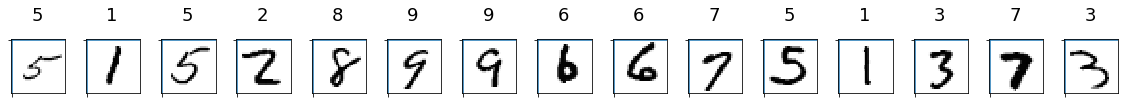

In [20]:
import json 
import numpy as np
import matplotlib.pyplot as plt

n = 15
sample_indices = np.random.permutation(test_images.shape[0])[0:n]

test_samples = json.dumps({"data": test_images[sample_indices].tolist()})
test_samples = bytes(test_samples, encoding = 'utf8')

# predict using the deployed model
result = service.run(input_data=test_samples)['result']

# compare actual value vs. the predicted values:
plt.figure(figsize = (20, 1))

for i, s in enumerate(sample_indices):
    plt.subplot(1, n, i + 1)
    plt.axhline('')
    plt.axvline('')
    
    # model returns array of probabilities for each observation, need to select the highest probability class
    predicted_value = result[i].index(max(result[i]))
    actual_value = list(test_labels[s]).index(max(test_labels[s]))
    # use different color for misclassified sample
    font_color = 'red' if actual_value != predicted_value else 'black'
    clr_map = plt.cm.gray if actual_value != predicted_value else plt.cm.Greys

    plt.text(x=10, y =-10, s=predicted_value, fontsize=18, color=font_color)
    plt.imshow(test_images[s].reshape(28, 28), cmap=clr_map)

plt.show()

In [21]:
import requests

input_data = json.dumps({"data": test_images[sample_indices].tolist()})

headers = {'Content-Type':'application/json'}

resp = requests.post(service.scoring_uri, input_data, headers=headers)

print("POST to url", service.scoring_uri)

result = json.loads(resp.text)['result']

for i, s in enumerate(sample_indices): 
    predicted_value = result[i].index(max(result[i]))
    actual_value = list(test_labels[s]).index(max(test_labels[s]))
    print("{}. Prediction = {}, Actual = {}".format(i, predicted_value, actual_value))

POST to url http://20.185.215.241:80/score
0. Prediction = 5, Actual = 5
1. Prediction = 1, Actual = 1
2. Prediction = 5, Actual = 5
3. Prediction = 2, Actual = 2
4. Prediction = 8, Actual = 8
5. Prediction = 9, Actual = 9
6. Prediction = 9, Actual = 9
7. Prediction = 6, Actual = 6
8. Prediction = 6, Actual = 6
9. Prediction = 7, Actual = 7
10. Prediction = 5, Actual = 5
11. Prediction = 1, Actual = 1
12. Prediction = 3, Actual = 3
13. Prediction = 7, Actual = 7
14. Prediction = 3, Actual = 3
